In [1]:
# %matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab as pl
import  glob, os, csv, sys, re


plt.style.use('default')
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.linewidth'] = 1.6
plt.rcParams["font.family"] = "Arial"


In [6]:
jobdf = pd.read_csv(os.getcwd()+'/jobsearch_2022_anonymized.csv',index_col=0)

In [7]:
jobdf.head()

,Applied,1st interview,2nd interview,3rd interview,4th interview,5th interview,6th interview,Rejected,Offer Letter
Company,,,,,,,,,
AA,3/2/22,NaN,NaN,NaN,NaN,NaN,NaN,3/23/22,NaN
AB,3/2/22,NaN,NaN,NaN,NaN,NaN,NaN,4/1/22,NaN
AC_1,3/2/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD,3/2/22,NaN,NaN,NaN,NaN,NaN,NaN,4/6/22,NaN
AE_1,3/4/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#convert to datetime format
for i in range(0,len(jobdf.columns)):
    jobdf.iloc[:,i] = pd.to_datetime(jobdf.iloc[:,i],infer_datetime_format=True)

In [9]:
companies = [i for i in jobdf.index]

In [10]:
#normalize colormap to the number of companies
colors = pl.cm.turbo(np.linspace(0,1,len(companies)))

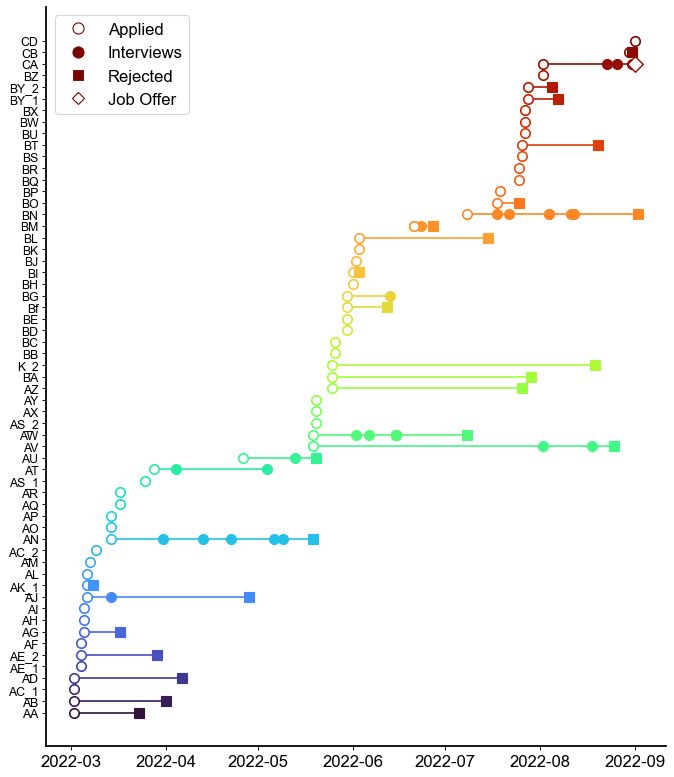

In [12]:
plt.figure(figsize=(10, 12), dpi=80)
for i,company in enumerate(companies):
    company_timeline = jobdf.loc[company]
    plt.plot(company_timeline.dropna(),[i]*len(company_timeline.dropna()),marker='o',color=colors[i],markersize=9)
    plt.plot(company_timeline.dropna()[0],i,marker='o',c='white',markersize=6)
    if not pd.isnull(company_timeline['Rejected']):
        plt.plot(company_timeline['Rejected'],i,marker='s',color=colors[i],markersize=9)
    if not pd.isnull(company_timeline['Offer Letter']):
        plt.plot(company_timeline['Offer Letter'],i,marker='D',color=colors[i],markersize=10)
        plt.plot(company_timeline['Offer Letter'],i,marker='D',color='white',markersize=8)

ax=plt.gca();
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(0,len(companies)));
ax.set_yticklabels(companies,fontsize=11);
plt.xticks(fontsize=15);

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_color = colors[len(colors)-1]
legend_elements = [Line2D([0], [0],marker='o', color='w', markerfacecolor='white', markeredgewidth=1, markeredgecolor=legend_color, label='Applied',markersize=10),
                   Line2D([0], [0], marker='o', color='w',markerfacecolor=legend_color, label='Interviews', markersize=12),
                   Line2D([0], [0], marker='s', color='w',markerfacecolor=legend_color, label='Rejected', markersize=10),
                   Line2D([0], [0], marker='D', color='w', markerfacecolor='white', markeredgewidth=1, markeredgecolor=legend_color, label='Job Offer', markersize=8),]


ax.legend(handles=legend_elements, loc='upper left',prop={'size': 15});


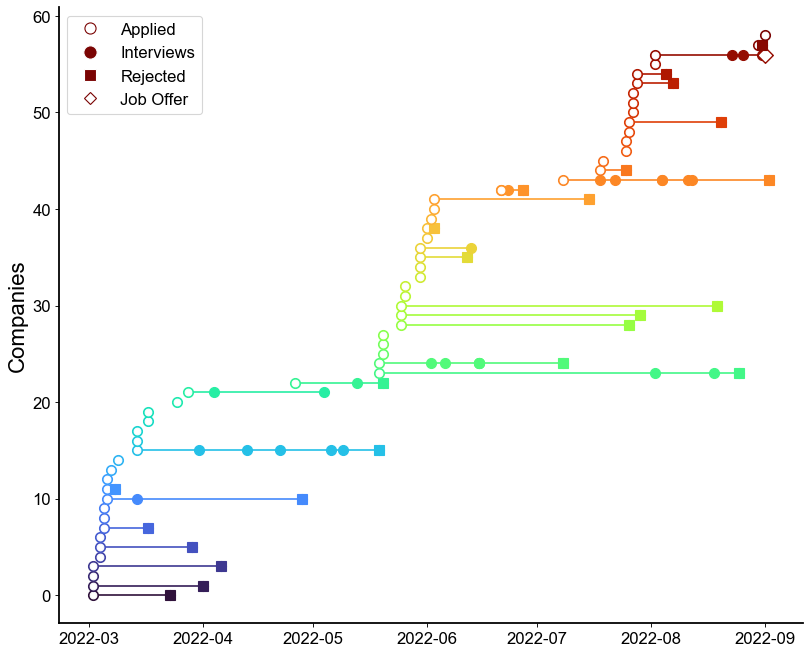

In [15]:
plt.figure(figsize=(12, 10), dpi=80)
for i,company in enumerate(companies):
    company_timeline = jobdf.loc[company]
    plt.plot(company_timeline.dropna(),[i]*len(company_timeline.dropna()),marker='o',color=colors[i],markersize=9)
    plt.plot(company_timeline.dropna()[0],i,marker='o',c='white',markersize=6)
    if not pd.isnull(company_timeline['Rejected']):
        plt.plot(company_timeline['Rejected'],i,marker='s',color=colors[i],markersize=9)
    if not pd.isnull(company_timeline['Offer Letter']):
        plt.plot(company_timeline['Offer Letter'],i,marker='D',color=colors[i],markersize=10)
        plt.plot(company_timeline['Offer Letter'],i,marker='D',color='white',markersize=8)

ax=plt.gca();
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Companies',fontsize=20)

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

#create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_color = colors[len(colors)-1]
legend_elements = [Line2D([0], [0],marker='o', color='w', markerfacecolor='white', markeredgewidth=1, markeredgecolor=legend_color, label='Applied',markersize=10),
                   Line2D([0], [0], marker='o', color='w',markerfacecolor=legend_color, label='Interviews', markersize=12),
                   Line2D([0], [0], marker='s', color='w',markerfacecolor=legend_color, label='Rejected', markersize=10),
                   Line2D([0], [0], marker='D', color='w', markerfacecolor='white', markeredgewidth=1, markeredgecolor=legend_color, label='Job Offer', markersize=8),]


ax.legend(handles=legend_elements, loc='upper left',prop={'size': 15});